# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_csv = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
#print the country count to confirm match
print(len(countries))

640
640


In [11]:
#create dataframe
ctweather_df = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country':countries, 'Date': "", 
                             'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})
ctweather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,quatre cocos,,MU,,,,,,
1,butaritari,,KI,,,,,,
2,narsaq,,GL,,,,,,
3,tuktoyaktuk,,CA,,,,,,
4,belushya guba,,RU,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
#keep track of response 
response_num = 1
response_set = 1

#api call
api_url = 'https://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#run call
print('''------------------
      Beginning Data Retrieval
      ---------------------\n''')
for index, row in ctweather_df.iterrows():
    #call url
    #based on example call url 
    call_url = api_url + row['City']+','+ '&appid=' + weather_api_key
    #call
    response = requests.get(call_url).json()
    #exception 
    try: 
        #print message
        print(f'Processing Weather Data for Response {response_num} of Set {response_set} | {response["name"]}')
        #input data into DF
        ctweather_df.loc[index, 'Cloudiness']= response['clouds']['all']
        ctweather_df.loc[index, 'Date']= response['dt']
        ctweather_df.loc[index, 'Humidity']= response['main']['humidity']
        ctweather_df.loc[index, 'Lat']= response['coord']['lat']
        ctweather_df.loc[index, 'Lng']= response['coord']['lon']
        ctweather_df.loc[index, 'Max Temp']= response['main']['temp_max']
        ctweather_df.loc[index, 'Windspeed']= response['wind']['speed']
        #increase response count
        response_num += 1
    except (KeyError, IndexError):
              print("City not Found------SKIP")
    #api call limiter to 
    if response_num == 51:
       response_set += 1
       response_num = 1
       time.sleep(60)
print('''--------------------
         Data Retrieval Finished
         -------------------- ''')
    
              

------------------
      Beginning Data Retrieval
      ---------------------

Processing Weather Data for Response 1 of Set 1 | Quatre Cocos
Processing Weather Data for Response 2 of Set 1 | Butaritari
Processing Weather Data for Response 3 of Set 1 | Narsaq
Processing Weather Data for Response 4 of Set 1 | Tuktoyaktuk
City not Found------SKIP
Processing Weather Data for Response 5 of Set 1 | Clyde River
City not Found------SKIP
Processing Weather Data for Response 6 of Set 1 | Dikson
Processing Weather Data for Response 7 of Set 1 | Leninskoye
Processing Weather Data for Response 8 of Set 1 | Cascais
City not Found------SKIP
Processing Weather Data for Response 9 of Set 1 | Leningradskiy
Processing Weather Data for Response 10 of Set 1 | Bambous Virieux
Processing Weather Data for Response 11 of Set 1 | Busselton
Processing Weather Data for Response 12 of Set 1 | Caserta
Processing Weather Data for Response 13 of Set 1 | Ushuaia
Processing Weather Data for Response 14 of Set 1 | Nama

Processing Weather Data for Response 29 of Set 3 | Lebu
City not Found------SKIP
City not Found------SKIP
Processing Weather Data for Response 30 of Set 3 | Ostrovnoy
Processing Weather Data for Response 31 of Set 3 | Nova Olinda do Norte
Processing Weather Data for Response 32 of Set 3 | Provideniya
Processing Weather Data for Response 33 of Set 3 | Hongjiang
Processing Weather Data for Response 34 of Set 3 | Camacha
Processing Weather Data for Response 35 of Set 3 | Rio Grande
Processing Weather Data for Response 36 of Set 3 | Manhattan
Processing Weather Data for Response 37 of Set 3 | Myitkyina
Processing Weather Data for Response 38 of Set 3 | Mossamedes
Processing Weather Data for Response 39 of Set 3 | Gornopravdinsk
Processing Weather Data for Response 40 of Set 3 | Verkh-Chebula
Processing Weather Data for Response 41 of Set 3 | Ulladulla
Processing Weather Data for Response 42 of Set 3 | Pánuco
City not Found------SKIP
Processing Weather Data for Response 43 of Set 3 | Ishino

Processing Weather Data for Response 7 of Set 6 | Fairbanks
Processing Weather Data for Response 8 of Set 6 | Kristiansund
Processing Weather Data for Response 9 of Set 6 | Payson
Processing Weather Data for Response 10 of Set 6 | Cayenne
Processing Weather Data for Response 11 of Set 6 | Datong
Processing Weather Data for Response 12 of Set 6 | Kisangani
Processing Weather Data for Response 13 of Set 6 | Caravelas
City not Found------SKIP
City not Found------SKIP
Processing Weather Data for Response 14 of Set 6 | Yārāda
Processing Weather Data for Response 15 of Set 6 | Bathsheba
Processing Weather Data for Response 16 of Set 6 | Bara
Processing Weather Data for Response 17 of Set 6 | Kyren
Processing Weather Data for Response 18 of Set 6 | Kanniyākumāri
City not Found------SKIP
Processing Weather Data for Response 19 of Set 6 | Fukuechō
Processing Weather Data for Response 20 of Set 6 | Cururupu
Processing Weather Data for Response 21 of Set 6 | Boyolangu
Processing Weather Data for 

Processing Weather Data for Response 40 of Set 8 | Esperance
Processing Weather Data for Response 41 of Set 8 | Farmington
Processing Weather Data for Response 42 of Set 8 | Roald
City not Found------SKIP
Processing Weather Data for Response 43 of Set 8 | Gresham
City not Found------SKIP
Processing Weather Data for Response 44 of Set 8 | Anadyr
City not Found------SKIP
Processing Weather Data for Response 45 of Set 8 | Saquarema
Processing Weather Data for Response 46 of Set 8 | Lichinga
Processing Weather Data for Response 47 of Set 8 | Osmeña
Processing Weather Data for Response 48 of Set 8 | Okhotsk
City not Found------SKIP
City not Found------SKIP
Processing Weather Data for Response 49 of Set 8 | Manokwari
Processing Weather Data for Response 50 of Set 8 | Thunder Bay
City not Found------SKIP
City not Found------SKIP
Processing Weather Data for Response 1 of Set 9 | Dakoro
Processing Weather Data for Response 2 of Set 9 | Kurumkan
Processing Weather Data for Response 3 of Set 9 | 

City not Found------SKIP
City not Found------SKIP
City not Found------SKIP
Processing Weather Data for Response 17 of Set 11 | Nanga Eboko
Processing Weather Data for Response 18 of Set 11 | Beyneu
City not Found------SKIP
Processing Weather Data for Response 19 of Set 11 | Masallātah
Processing Weather Data for Response 20 of Set 11 | Azángaro
Processing Weather Data for Response 21 of Set 11 | Karpogory
Processing Weather Data for Response 22 of Set 11 | Alofi
Processing Weather Data for Response 23 of Set 11 | Auki
Processing Weather Data for Response 24 of Set 11 | Vestmannaeyjar
City not Found------SKIP
Processing Weather Data for Response 25 of Set 11 | Prainha
Processing Weather Data for Response 26 of Set 11 | Malpe
Processing Weather Data for Response 27 of Set 11 | Dickinson
Processing Weather Data for Response 28 of Set 11 | Tongchuanshi
Processing Weather Data for Response 29 of Set 11 | Nortelândia
Processing Weather Data for Response 30 of Set 11 | Vanimo
Processing Weath

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
#clean df
ctweather_df['Max Temp']= ctweather_df['Max Temp'].replace('',np.nan)
ctweather_df = ctweather_df.dropna()

#save df to csv
ctweather_df.to_csv("CityWeatherData.csv")

ctweather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,quatre cocos,75,MU,1586649007,83,-20.21,57.76,75.99,5.82
1,butaritari,88,KI,1586648915,74,3.07,172.79,84.04,10.36
2,narsaq,100,GL,1586648870,39,60.92,-46.05,46.40,38.03
3,tuktoyaktuk,20,CA,1586649008,84,69.45,-133.04,6.80,11.41
5,clyde river,20,CA,1586649008,84,70.47,-68.59,5.00,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

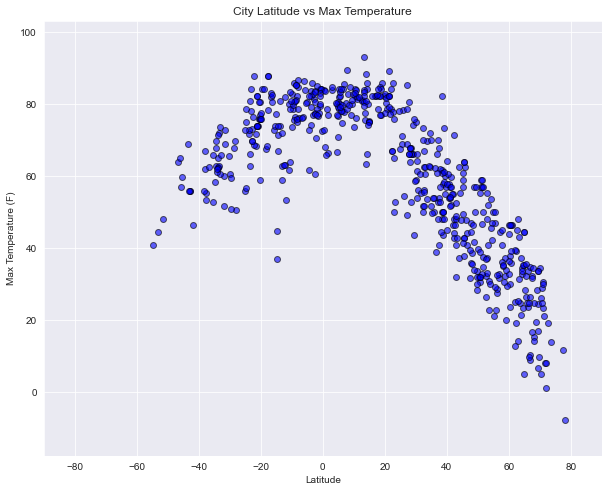

In [26]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(ctweather_df['Lat'], ctweather_df['Max Temp'], c='blue', alpha=.6, linewidth=1, edgecolor='black')
ax.set_xlim(-90,90)
ax.set_ylim(min(ctweather_df['Max Temp'])-10,max(ctweather_df['Max Temp'])+10)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs Max Temperature")

plt.savefig("LatvTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

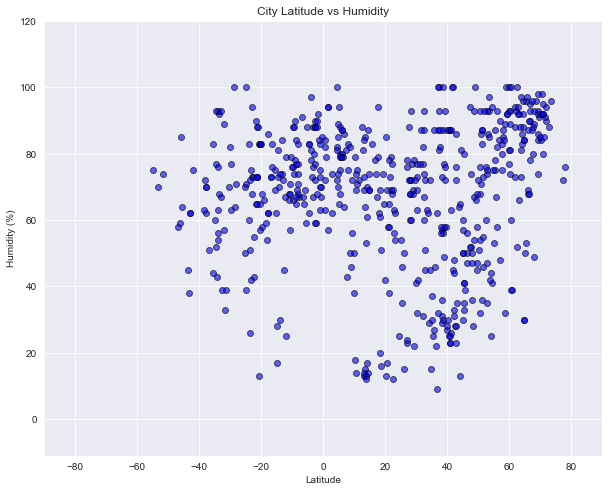

In [23]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(ctweather_df['Lat'], ctweather_df['Humidity'], c='blue', alpha=.6, linewidth=1, edgecolor='black')
ax.set_xlim(-90,90)
ax.set_ylim(min(ctweather_df['Humidity'])-10,max(ctweather_df['Humidity'])+10)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs Humidity")

plt.savefig("LatvHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

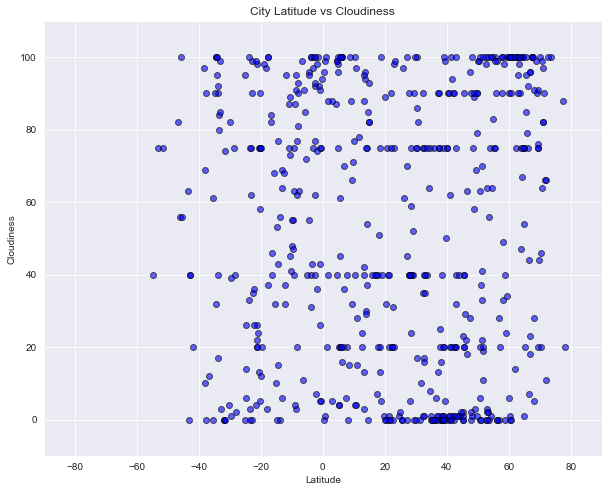

In [25]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(ctweather_df['Lat'], ctweather_df['Cloudiness'], c='blue', alpha=.6, linewidth=1, edgecolor='black')
ax.set_xlim(-90,90)
ax.set_ylim(min(ctweather_df['Cloudiness'])-10,max(ctweather_df['Cloudiness'])+10)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")
ax.set_title("City Latitude vs Cloudiness")

plt.savefig("LatvCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

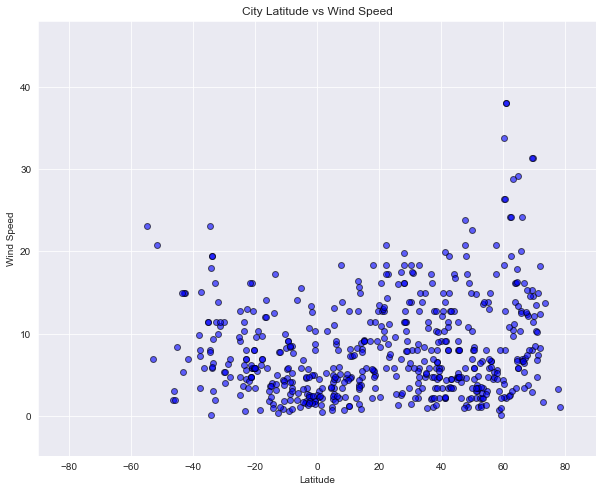

In [30]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(ctweather_df['Lat'], ctweather_df['Windspeed'], c='blue', alpha=.6, linewidth=1, edgecolor='black')
ax.set_xlim(-90,90)
ax.set_ylim(min(ctweather_df['Windspeed']-5),max(ctweather_df['Windspeed'])+10)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")
ax.set_title("City Latitude vs Wind Speed")

plt.savefig("LatvWind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression